In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Telco_customer.csv")
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.drop(columns = ["customerID"],inplace = True)

## \*\*No Missing Values\*\*

In [5]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for col in data.columns:
    print(col,":",data[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

### Replace "No internet service" with "No" for the simplicity 

In [7]:
data.replace("No internet service","No" , inplace =True)
data.replace("No phone service","No", inplace =True)

In [8]:
data[(data=="No internet service").any(axis = 1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
data[(data=="No phone service").any(axis = 1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## total charges is the object I need to convert that to float

In [10]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# pd.to_numeric(data.TotalCharges)   returns a error as it contains the " "

In [12]:
data[data.TotalCharges == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data = data[~(data.TotalCharges == " ")]
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [15]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## \*\*Independent and Dependent*\*

In [16]:
X = data.drop(columns = ["Churn"])
y = data.Churn

## \*\*Converting The Data\*\*

In [17]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop = "first")
df_objects = encode.fit_transform(X.select_dtypes(["object"])).toarray()
columns = encode.get_feature_names_out(X.select_dtypes(["object"]).columns)
data_encoded_object = pd.DataFrame(data = df_objects, columns = columns)
data_encoded_object

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(X.select_dtypes(["int64","float64"]))
columns = X.select_dtypes(["int64","float64"]).columns 
data_scaled = pd.DataFrame(df,columns = columns)
data_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994194
1,-0.440327,0.064303,-0.260878,-0.173740
2,-0.440327,-1.239504,-0.363923,-0.959649
3,-0.440327,0.512486,-0.747850,-0.195248
4,-0.440327,-1.239504,0.196178,-0.940457
...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180
7028,-0.440327,1.612573,1.276493,2.241056
7029,-0.440327,-0.872808,-1.170004,-0.854514
7030,2.271039,-1.158016,0.319168,-0.872095


In [19]:
X_scaled = pd.concat([data_scaled, data_encoded_object],axis = "columns")
X_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.440327,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.440327,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.440327,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y = encode.fit_transform(y)
y_scaled = pd.DataFrame(y,columns=["Churn"])
y_scaled.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# Simple Neural Network model

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2,random_state = 22)

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
model = keras.Sequential([
    keras.layers.Dense(23,input_shape = (X_scaled.shape[1],),activation = "relu"),
    keras.layers.Dense(1,activation = "sigmoid")
])

C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [25]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7382 - loss: 0.5396
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4290
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.4342
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8060 - loss: 0.4235
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4132
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4171
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4251
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: 0.4060
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4125
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4107
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.4109
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [26]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [27]:
y_pred_int = []
for i in y_pred:
    if i > 0.5:
        y_pred_int.append(1)
    else:
        y_pred_int.append(0)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_int))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1031
           1       0.68      0.43      0.53       376

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_int)
cm

array([[954,  77],
       [213, 163]])

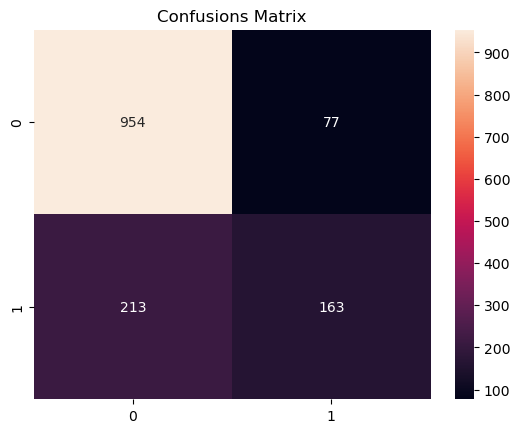

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.xlabel("predictions")
plt.ylabel("Truth")
plt.title("Confusions Matrix")
sns.heatmap(cm,annot = True,fmt ="d")
plt.show()

# loss and the accuracy

In [31]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7799 - loss: 0.4387


[0.43388524651527405, 0.7938876748085022]

# REDUCE THE IMBALANCE IN THE DATASET 

In [32]:
y_scaled.value_counts()

Churn
0        5163
1        1869
Name: count, dtype: int64

In [33]:
scaled_data = pd.concat([X_scaled,y_scaled], axis = 1)

In [34]:
scaled_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.440327,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,-0.440327,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.440327,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
7028,-0.440327,1.612573,1.276493,2.241056,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
7029,-0.440327,-0.872808,-1.170004,-0.854514,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
7030,2.271039,-1.158016,0.319168,-0.872095,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [35]:
leave = scaled_data[scaled_data.Churn==1]
stay = scaled_data[scaled_data.Churn==0]

In [36]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from sklearn.metrics import classification_report

In [37]:
def SNN(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 23,stratify = y)
    model = keras.Sequential([
        keras.layers.Dense(23,input_shape = (X.shape[1],)),
        keras.layers.Dense(30,activation = "relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(15,activation = "relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1,activation = "sigmoid")
    ])

    model.compile(
        optimizer = "adam",
        loss = "binary_crossentropy",
        metrics = ["accuracy"]
    )

    print("\n==========Train The Model =========\n",model.fit(X_train,y_train,epochs = 50))

    y_pred = model.predict(X_test)

    y_pred_list = []
    for i in y_pred:
        if i > 0.5:
            y_pred_list.append(1)
        else:
            y_pred_list.append(0)

    print("\n========Model Evaluation ==========\n",model.evaluate(X_test,y_test))

    print(classification_report(y_test,y_pred_list))

# Methods to avoid that 

In [38]:
print(stay.shape)
stay.head()

(5163, 24)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.440327,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,-0.440327,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,-0.440327,-0.424625,0.807802,-0.147313,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
7,-0.440327,-0.913552,-1.165018,-0.874169,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [39]:
print(leave.shape)
leave.head()

(1869, 24)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
2,-0.440327,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,-0.440327,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
5,-0.440327,-0.995040,1.158489,-0.645369,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
8,-0.440327,-0.180161,1.329677,0.336516,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
13,-0.440327,0.675462,1.293113,1.214589,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1


## METHOD -1 -> \*\*under sample\*\* (divide the samples in the equal ammount)  so consider the minimum amount of sample and divide the dataset 

In [40]:
X_stay = stay.sample(1869)
X_leave = leave
X_stay.shape,X_leave.shape

((1869, 24), (1869, 24))

In [41]:
data_US = pd.concat([X_stay,X_leave], axis = 0)

In [42]:
print(data_US.Churn.value_counts())
data_US.shape

Churn
0    1869
1    1869
Name: count, dtype: int64


(3738, 24)

In [43]:
X_US = data_US.drop(columns = ["Churn"])
y_US = data_US.Churn

In [44]:
SNN(X_US,y_US)

Epoch 1/50


C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5859 - loss: 0.6761
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.5916
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.5588
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7515 - loss: 0.5166
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.5195
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7578 - loss: 0.5054
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.5300
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7597 - loss: 0.4933
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.5095
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7536 - loss: 0.5163
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.4941
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.4951


### METHOD - 2 -> \*\*Oversampling\*\*  (Randomly Duplicates the required samples like the minimum get gets duplicated)

In [45]:
scaled_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.440327,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,-0.440327,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.440327,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
7028,-0.440327,1.612573,1.276493,2.241056,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
7029,-0.440327,-0.872808,-1.170004,-0.854514,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
7030,2.271039,-1.158016,0.319168,-0.872095,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [46]:
stay.shape,leave.shape

((5163, 24), (1869, 24))

In [47]:
over_sample_leave = leave.sample(stay.shape[0], replace = True)

In [48]:
stay.shape,over_sample_leave.shape

((5163, 24), (5163, 24))

In [49]:
data_over_sample = pd.concat([stay, over_sample_leave])

In [50]:
data_over_sample.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.440327,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,-0.440327,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,-0.440327,-0.424625,0.807802,-0.147313,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
7,-0.440327,-0.913552,-1.165018,-0.874169,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [51]:
X_OS = data_over_sample.drop(columns = ["Churn"])
y_OS = data_over_sample.Churn

In [52]:
SNN(X_OS,y_OS)

Epoch 1/50


C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6162 - loss: 0.6498
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7321 - loss: 0.5393
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7449 - loss: 0.5288
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7502 - loss: 0.5221
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7558 - loss: 0.5048
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7647 - loss: 0.5049
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.4986
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7643 - loss: 0.4991
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7596 - loss: 0.5054
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7667 - loss: 0.4930
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7662 - loss: 0.4885
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

### METHOD - 3 -> \*\*SMOTE\*\* (generate a new sample from the existing data not the duplicates)

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
scaled_data.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [55]:
X_smote = scaled_data.drop(columns = ["Churn"])
y_smote = scaled_data.Churn

In [56]:
smote = SMOTE(sampling_strategy = "minority")
X_sm, y_sm = smote.fit_resample(X_smote,y_smote)
print(y_sm.value_counts())
X_sm.shape,y_sm.shape

Churn
0    5163
1    5163
Name: count, dtype: int64


((10326, 23), (10326,))

In [57]:
SNN(X_sm,y_sm)

Epoch 1/50


C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6033 - loss: 0.6511
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7534 - loss: 0.5240
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7583 - loss: 0.5158
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7755 - loss: 0.4879
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7698 - loss: 0.4884
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7695 - loss: 0.4784
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7789 - loss: 0.4808
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7770 - loss: 0.4746
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7765 - loss: 0.4832
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7817 - loss: 0.4771
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7777 - loss: 0.4743
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

### METHOD - 4 -> \*\*Ensamble with undersampling\*\*

In [58]:
scaled_data.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [59]:
def get_batch(majority_data, minority_data, step, batchs):
    mini_batches  = []
    for i in range(batchs):
        new_batch = majority_data[step*i: step*(i+1)]
        batch = pd.concat([new_batch, minority_data])
        mini_batches.append(batch)
        batch = None
    return mini_batches

In [60]:
step = min(stay.shape[0],leave.shape[0])
batchs = int(np.round(max(stay.shape[0],leave.shape[0])/step))

In [61]:
mini_batches = get_batch(stay,leave,step,batchs)

In [62]:
for batch in mini_batches:
    X_batch = batch.drop(columns = ["Churn"])
    y_batch = batch.Churn
    SNN(X_batch,y_batch)

Epoch 1/50


C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5343 - loss: 0.7008
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.6016
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7371 - loss: 0.5460
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7483 - loss: 0.5272
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.5262
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.5252
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.5221
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.5277
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.5147
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.5127
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7654 - loss: 0.5039
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7680 - loss: 0.4858


C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5652 - loss: 0.6802
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5827
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.5331
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.5304
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7465 - loss: 0.5302
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7619 - loss: 0.5086
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.5210
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7550 - loss: 0.5287
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.5116
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7588 - loss: 0.5140
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5220
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7561 - loss: 0.5137


C:\ProgramData\miniconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5770 - loss: 0.7231
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.5832
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5354
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7588 - loss: 0.5278
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.5182
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7604 - loss: 0.5016
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7746 - loss: 0.4863
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7639 - loss: 0.5180
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.4657
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7747 - loss: 0.4733
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7643 - loss: 0.4791
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7774 - loss: 0.4705


# \*\*approx values\*\*
# With Imbalance 
               precision    recall  f1-score   support

            0       0.83      0.92      0.87      1031
            1       0.67      0.47      0.56       376

    accuracy                            0.80      1407
    macro avg       0.75      0.69      0.71      1407
    weighted avg    0.79      0.80      0.79      1407

# Without Imbalance 

## Under sample
               precision    recall  f1-score   support

            0       0.77      0.75      0.76       374
            1       0.76      0.78      0.77       374

    accuracy                            0.76       748
    macro avg       0.76      0.76      0.76       748
    weighted avg    0.76      0.76      0.76       748

## Oversampling
               precision    recall  f1-score   support

            0       0.84      0.69      0.76      1033
            1       0.74      0.87      0.80      1033

    accuracy                            0.78      2066
    macro avg       0.79      0.78      0.78      2066
    weighted avg    0.79      0.78      0.78      2066

## SMOTE
               precision    recall  f1-score   support

            0       0.80      0.78      0.79      1033
            1       0.78      0.80      0.79      1033

    accuracy                            0.79      2066
    macro avg       0.79      0.79      0.79      2066
    weighted avg    0.79      0.79      0.79      2066


## Ensemble with under sampling (divided into 3 parts)

### Batch 1
               precision    recall  f1-score   support

            0       0.78      0.74      0.76       374
            1       0.76      0.79      0.77       374

    accuracy                            0.77       748
    macro avg       0.77      0.77      0.77       748
    weighted avg    0.77      0.77      0.77       748

              
### Batch 2
               precision    recall  f1-score   support

            0       0.79      0.74      0.76       374
            1       0.75      0.80      0.78       374
 
    accuracy                            0.77       748
    macro avg       0.77      0.77      0.77       748
    weighted avg    0.77      0.77      0.77       748


### Batch 3
               precision    recall  f1-score   support

            0       0.74      0.69      0.71       285
            1       0.77      0.81      0.79       374

    accuracy                            0.76       659
    macro avg       0.76      0.75      0.75       659
    weighted avg    0.76      0.76      0.76       659